In [10]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_transformer


import matplotlib.pyplot as plt

titanic = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")




plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic_test['Family'] = titanic_test['SibSp'] + titanic_test['Parch'] +1 
titanic.Family = titanic.Family.map(lambda x: 0 if x > 4 else x)
titanic_test.Family = titanic_test.Family.map(lambda x: 0 if x > 4 else x)



features = ["Pclass","Sex","SibSp","Parch","Age","Family"]
X = titanic[features]
y = titanic["Survived"]
X_test = titanic_test[features]




def clean_data(data):
    data['Age'] =  data['Age'].fillna(data['Age'].dropna().median())
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] =='female',  'Sex'] = 1
    
clean_data(X)
clean_data(X_test)

print(X.isnull().sum())

features_num = ["Pclass","Age","SibSp","Parch","Sex","Family"]

transformer_num = make_pipeline(
        SimpleImputer(strategy="constant"),
        StandardScaler()
)



"""
features_cat = ["Embarked"]

#transformer_cat = make_pipeline(
     #SimpleImputer(strategy="constant", fill_value="NA"),
     #OneHotEncoder(handle_unknown='ignore')                       
#)
"""


preprocessor = make_column_transformer(
      (transformer_num, features_num))
    



    
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.7)




X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)


input_shape = [X_train.shape[1]]





X.head()
    


Pclass    0
Sex       0
SibSp     0
Parch     0
Age       0
Family    0
dtype: int64


/home/ondra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ondra/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Pclass,Sex,SibSp,Parch,Age,Family
0,3,0,1,0,22.0,2
1,1,1,1,0,38.0,2
2,3,1,0,0,26.0,1
3,1,1,1,0,35.0,2
4,3,0,0,0,35.0,1


Epoch 1/200
3/3 [==============================] - 2s 124ms/step - loss: 0.9081 - binary_accuracy: 0.5104 - val_loss: 0.6982 - val_binary_accuracy: 0.3993
Epoch 2/200
3/3 [==============================] - 0s 15ms/step - loss: 0.8912 - binary_accuracy: 0.5104 - val_loss: 0.6908 - val_binary_accuracy: 0.6679
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 0.7649 - binary_accuracy: 0.5843 - val_loss: 0.6831 - val_binary_accuracy: 0.6978
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.8022 - binary_accuracy: 0.6212 - val_loss: 0.6764 - val_binary_accuracy: 0.7575
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7695 - binary_accuracy: 0.5827 - val_loss: 0.6702 - val_binary_accuracy: 0.7873
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7205 - binary_accuracy: 0.6180 - val_loss: 0.6637 - val_binary_accuracy: 0.8022
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6

<AxesSubplot:title={'center':'Accuracy'}>

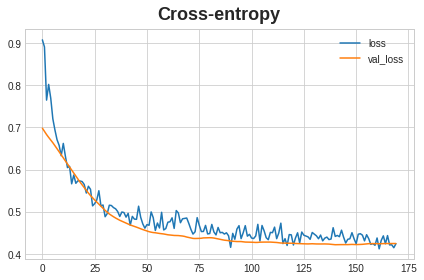

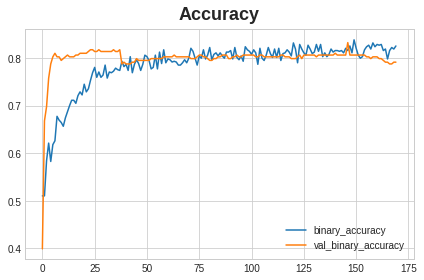

In [11]:
from tensorflow import keras 
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(16,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
     
])




model.compile(
optimizer ='adam',
loss='binary_crossentropy',
metrics=['binary_accuracy']
)



early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid,y_valid),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    
)


history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")